# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key and set units
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Set base url to make requests
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=imperial&q="

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city list and count to confirm sufficient count and proper syntax
len(cities)

616

### Perform API Calls

In [4]:
#Creating all of the lists which will be appeneded in the following for loop
cityName = []
cloudiness = []
date = []
humidity = []
lats = []
lngs = []
maxTemp = []
windSpeed = []
country = []

#Creating 2 counter variables to keep track of the number in each set being printed
counter = 0
set_counter = 1

# Print statement header 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#for loop with try and except statement to prevent the compile from erroring and stopping due to lacking info on a city
for city in cities:
    try:
        #Requesting info from the url and appending all of our lists with this info
        response = requests.get(url + city).json()
        cityName.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        maxTemp.append(response["main"]["temp_max"])
        windSpeed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        #logic to count through the sets and numbers in each set, resetting at 50 in each set
        if counter > 49:
            counter = 1
            set_counter += 1
        else:
            counter += 1
            
        print(f"Processing Record {counter} of Set {set_counter} | {city}")

    #If there is an error due to missing info, print this statement
    except: 
        print("City not found. Skipping...")
        
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | tsumeb
Processing Record 2 of Set 1 | ponta do sol
Processing Record 3 of Set 1 | coihaique
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | sivas
Processing Record 7 of Set 1 | raton
Processing Record 8 of Set 1 | torbay
Processing Record 9 of Set 1 | tasiilaq
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | broome
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | shenjiamen
Processing Record 16 of Set 1 | arecibo
City not found. Skipping...
Processing Record 17 of Set 1 | baghdad
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | cache creek
Processing Record 20 of Set 1 | payo
Processing Record 21 of Set 1 | porto velho
Processing Record 22 of Set 1 | bubaq

Processing Record 42 of Set 4 | bay roberts
City not found. Skipping...
Processing Record 43 of Set 4 | fort nelson
City not found. Skipping...
Processing Record 44 of Set 4 | ivdel
City not found. Skipping...
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | kieta
Processing Record 47 of Set 4 | hashtrud
Processing Record 48 of Set 4 | hasaki
Processing Record 49 of Set 4 | naples
City not found. Skipping...
Processing Record 50 of Set 4 | stornoway
City not found. Skipping...
Processing Record 1 of Set 5 | butaritari
Processing Record 2 of Set 5 | salalah
Processing Record 3 of Set 5 | buta
Processing Record 4 of Set 5 | esperance
Processing Record 5 of Set 5 | mahebourg
Processing Record 6 of Set 5 | baiyin
Processing Record 7 of Set 5 | danilov
Processing Record 8 of Set 5 | bagan
Processing Record 9 of Set 5 | flin flon
Processing Record 10 of Set 5 | georgetown
Processing Record 11 of Set 5 | garowe
Processing Record 12 of Set 5 | san vicente
Processing Record

Processing Record 28 of Set 8 | bonham
Processing Record 29 of Set 8 | la serena
Processing Record 30 of Set 8 | gavle
Processing Record 31 of Set 8 | fortuna
Processing Record 32 of Set 8 | hualmay
Processing Record 33 of Set 8 | russell
Processing Record 34 of Set 8 | cam ranh
Processing Record 35 of Set 8 | sept-iles
Processing Record 36 of Set 8 | pottstown
Processing Record 37 of Set 8 | mackay
Processing Record 38 of Set 8 | nayoro
Processing Record 39 of Set 8 | lucea
Processing Record 40 of Set 8 | parkes
Processing Record 41 of Set 8 | krasnoznamensk
Processing Record 42 of Set 8 | ponta delgada
Processing Record 43 of Set 8 | port victoria
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 | katherine
Processing Record 46 of Set 8 | palmer
Processing Record 47 of Set 8 | san rafael
Processing Record 48 of Set 8 | ankara
Processing Record 49 of Set 8 | okhotsk
Processing Record 50 of Set 8 | arona
Processing Record 1 of Set 9 | chaihe
Processing Record 

Processing Record 14 of Set 12 | grand forks
Processing Record 15 of Set 12 | taltal
------------------------------
Data Retrieval Complete
------------------------------


In [6]:
#Creating the list of dictionaries which will be converted into a dataframe
weather_dict = {
    "City": cityName,
    "Cloudiness": cloudiness ,
    "Country": country ,
    "Date": date,
    "Humidity": humidity ,
    "Lat.": lats,
    "Lng.": lngs, 
    "Max Temp": maxTemp ,
    "Wind Speed": windSpeed
}

#Creating the dataframe 
weather_df = pd.DataFrame(weather_dict)

#Showing the count of all values in the dataframe
weather_df.count()

City          565
Cloudiness    565
Country       565
Date          565
Humidity      565
Lat.          565
Lng.          565
Max Temp      565
Wind Speed    565
dtype: int64

In [7]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat.,Lng.,Max Temp,Wind Speed
0,Tsumeb,99,NA,1579826141,75,-19.23,17.72,70.39,7.65
1,Ponta do Sol,20,PT,1579826331,51,32.67,-17.10,60.80,6.93
2,Coyhaique,75,CL,1579826141,44,-45.58,-72.07,57.20,5.82
3,Pacific Grove,1,US,1579826196,63,36.62,-121.92,62.01,10.71
4,Rikitea,0,PF,1579826141,79,-23.12,-134.97,79.30,17.49


### Plotting the Data

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

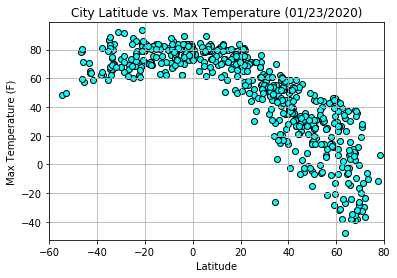

In [8]:
#update to display the date that the program was run, shane did datetime.datetime
plt.scatter(lats, maxTemp, edgecolors="black", facecolors="aqua")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Max Temperature (01/23/2020)")
plt.grid(True)
plt.axis([-60, 80, min(maxTemp)-5, max(maxTemp)+5])
plt.savefig("Figures/City_Latitude_vs._Max_Temperature.png")
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

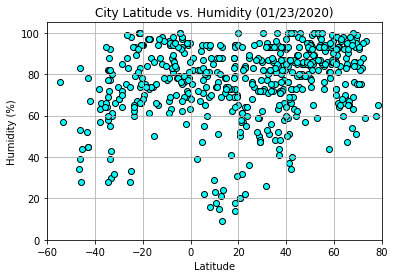

In [9]:
plt.scatter(lats, humidity, edgecolors="black", facecolors="aqua")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Humidity (01/23/2020)")
plt.grid(True)
plt.axis([-60, 80, 0, max(humidity)+5])
plt.savefig("Figures/City_Latitude_vs._Humidity.png")
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

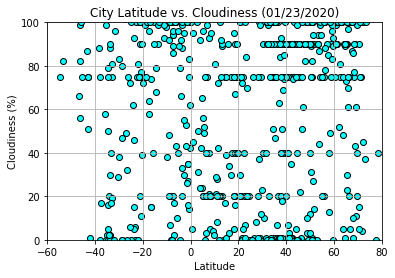

In [10]:
plt.scatter(lats, cloudiness, edgecolors="black", facecolors="aqua")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Cloudiness (01/23/2020)")
plt.grid(True)
plt.axis([-60, 80, 0, 100])
plt.savefig("Figures/City_Latitude_vs._Cloudiness.png")
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

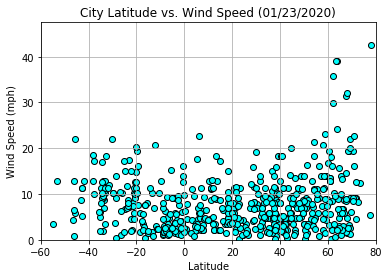

In [11]:
plt.scatter(lats, windSpeed, edgecolors="black", facecolors="aqua")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title("City Latitude vs. Wind Speed (01/23/2020)")
plt.grid(True)
plt.axis([-60, 80, 0, max(windSpeed)+5])
plt.savefig("Figures/City_Latitude_vs._Wind_Speed.png")
plt.show

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
#northern hemispehere lat < 0 ; southern < 0

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression